In [1]:
from utils.iterative_greedy_algorithm import IG
from utils.visualization_animation import louvain_animation
from utils.communities_network import  calc_nmi, communities_to_labels
from utils.utils import read_community_labels_file_reel 

import networkx as nx
import matplotlib.pyplot as plt

# Tests

In [2]:
animation_output_path = r"./output/animations"

## 1.Reel

### 1.1 Dophins

In [3]:

file_path = 'data/reel/dolphins/dolphins.gml'
G = nx.read_gml(file_path)
adj_matrix = nx.to_numpy_array(G)
adj_matrix.shape[0]

62

In [4]:
communities , modularity_trace , communities_trace , animation_frames = IG(adj_matrix, 50, beta=.5)

print(f"IG done in {len(modularity_trace)} iterations")
print(f"Founds {len(communities)} communities")
true_communities = read_community_labels_file_reel("data/reel/dolphins/groundTruth.txt")
nmi_trace = [calc_nmi(true_communities, communities_to_labels(
    G, c)) for c in communities_trace]
print(f"NMI: {nmi_trace[-1]}")

IG:   0%|          | 0/50 [00:00<?, ?it/s]

IG done in 13 iterations
Founds 6 communities
NMI: 0.7051598219642217


MovieWriter ffmpeg unavailable; using Pillow instead.


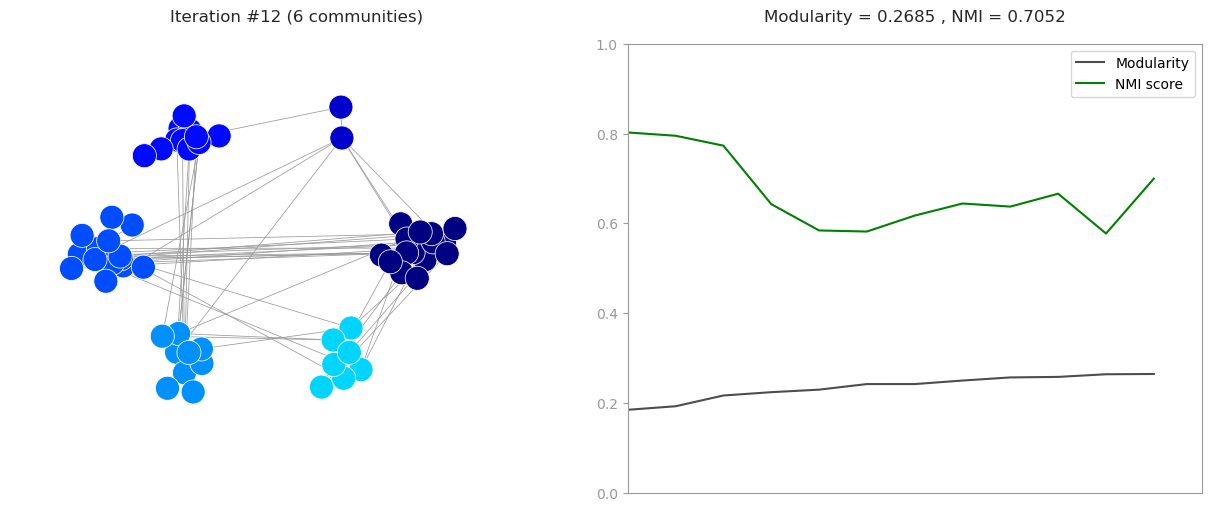

In [5]:
anim = louvain_animation(adj_matrix, animation_frames , nmi_trace, dark=False,
                  duration=60, filename=f"{animation_output_path}/dophins.gif", dpi=200)